<a href="https://www.kaggle.com/code/vedatgul/nlp-sentiment-analysis-with-amazon-kosmos-dataset?scriptVersionId=144291104" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

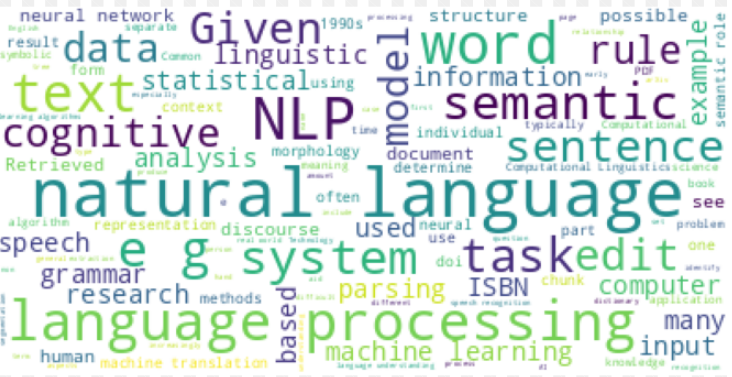

<div style="padding: 40px; background: radial-gradient(circle, #f5f7fa, #e2e9f0); border: 4px double #d1d8e0; border-radius: 30px; box-shadow: 0 10px 20px rgba(0,0,0,0.1); font-size: 120%; line-height: 1.9; color: #333; font-family: 'Georgia', serif; text-align: justify; position: relative;">
    <p style="color: #f39c12; font-size: 135%; border-left: 15px solid #3498db; padding-left: 20px; letter-spacing: 1px;"><strong>Business Problem</strong></p>
    <p>Cosmos, which produces home textiles and daily wear-oriented products that sell through Amazon, increases its sales by analyzing the comments on its products and improving its features according to the complaints it receives.
        aims to increase. In line with this goal, the comments will be labeled by performing sentiment analysis and a classification model will be created with the labeled data.</p>

In [ ]:
# Download the libraries if you don't have
!pip install nltk
!pip install twython
!pip install textblob
!pip install wordcloud
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from textblob import Word, TextBlob
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from nltk.sentiment import SentimentIntensityAnalyzer
from warnings import filterwarnings

filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.width', 400)

<div style="padding: 40px; background: radial-gradient(circle, #f5f7fa, #e2e9f0); border: 4px double #d1d8e0; border-radius: 30px; box-shadow: 0 10px 20px rgba(0,0,0,0.1); font-size: 120%; line-height: 1.9; color: #333; font-family: 'Georgia', serif; text-align: justify; position: relative;">
    <p style="color: #f39c12; font-size: 135%; border-left: 15px solid #3498db; padding-left: 20px; letter-spacing: 1px;"><strong>Dataset Story</strong></p>
    <p>The data set consists of the comments made for a certain product group, the title of the comment, the number of stars and the variables that indicate how many people found the comment useful.

 **Star:** Number of stars given to the product
        
 **HelpFul:** Number of people who found the comment helpful
        
 **Title:** Title given to comment content, short comment
        
 **Review:** Comment on the product</p>

In [ ]:
df=pd.read_excel("/kaggle/input/amazon-reviews/amazon.xlsx")

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
df.shape

# <div style="padding: 30px; color:white; margin:10; font-size:150%; text-align:left; display:fill; border-radius:10px; background-color:#3b3745"><b><span style='color:#F1A424'> 1 |</span></b> <b>Text Preprocessing</b></div>

<div style="padding: 40px; background: radial-gradient(circle, #f5f7fa, #e2e9f0); border: 4px double #d1d8e0; border-radius: 30px; box-shadow: 0 10px 20px rgba(0,0,0,0.1); font-size: 120%; line-height: 1.9; color: #333; font-family: 'Georgia', serif; text-align: justify; position: relative;">
    <p style="color: #f39c12; font-size: 135%; border-left: 15px solid #3498db; padding-left: 20px; letter-spacing: 1px;"><strong></strong></p>
   
**Convert Text to Lowercase:** Writing text entirely in lower case helps to avoid the difference between upper and lower case.

**Removing Punctuation:** Punctuation marks (periods, commas, exclamation marks, question marks, etc.) often add unnecessary noise to text.

**Replace Numbers with a Space:** You can replace numbers with a space character or other non-deterministic character.

**Removing stopwords:** Stop words, (e.g., "and", "or", "but", "that") are usually unimportant for text analysis and can therefore be removed.
 
**Tokenization:** Separating text at the sentence or word level breaks the text into smaller chunks and facilitates analysis.

**Lemmatisation:** These operations, called stemming operations, help to find the root of the word or convert the word to its dictionary meaning. For example, you can translate the word "running" into "run". to the word "word".</p>

In [ ]:
# Convert Text to Lowercase
df['Review'] = df['Review'].str.lower()
df['Review'].head(10)

In [ ]:
# Punctuations
df['Review'] = df['Review'].str.replace(r'[^\w\s]', '', regex=True)
df['Review'].head(10)

In [ ]:
# Replace Numbers with a Space
df['Review']=df['Review'].str.replace('\d','',regex=True)
df['Review'].head(10)

In [ ]:
# Stopwords
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words('english')

In [ ]:
df['Review'] = df['Review'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))
df['Review'].head(10)

In [ ]:
# Rarewords
del_ = pd.Series(' '.join(df['Review']).split()).value_counts()[-1000:]
df['Review'] = df['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in del_))

In [ ]:
# Lemmatization
nltk.download('punkt')
nltk.download('wordnet')
df['Review'] = df['Review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['Review'].head(10)

# <div style="padding: 30px; color:white; margin:10; font-size:150%; text-align:left; display:fill; border-radius:10px; background-color:#3b3745"><b><span style='color:#F1A424'>2 |</span></b> <b>Data Visualisation</b></div>

<div style="padding: 40px; background: radial-gradient(circle, #f5f7fa, #e2e9f0); border: 4px double #d1d8e0; border-radius: 30px; box-shadow: 0 10px 20px rgba(0,0,0,0.1); font-size: 120%; line-height: 1.9; color: #333; font-family: 'Georgia', serif; text-align: justify; position: relative;">
    <p style="color: #f39c12; font-size: 135%; border-left: 15px solid #3498db; padding-left: 20px; letter-spacing: 1px;"><strong></strong></p>
   
**Barplot:** Barplot is a type of graph used to visualise categorical data. It is often used to show frequencies or relationships of frequently occurring categorical values.

**Word Cloud:** Word Cloud is a type of chart used to visualise text data and highlight the importance of certain words. They are visually represented in different sizes and colours according to the frequency of the words in the text.</p>

In [ ]:
# Barplot
tf = df["Review"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
tf.columns = ["words", "tf"]
tf[tf["tf"] > 500].plot.bar(x="words", y="tf")
plt.show()

In [ ]:
# Wordcloud
text = " ".join(i for i in df.Review)

wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# <div style="padding: 30px; color:white; margin:10; font-size:150%; text-align:left; display:fill; border-radius:10px; background-color:#3b3745"><b><span style='color:#F1A424'>3 |</span></b> <b>Sentiment Analysis</b></div>

In [ ]:
sia = SentimentIntensityAnalyzer()

In [ ]:
df["Review"][0:10].apply(lambda x: sia.polarity_scores(x))

df["Review"][0:10].apply(lambda x: sia.polarity_scores(x)["compound"])

df["Review"][0:10].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

df["Sentiment_Label"] = df["Review"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

df.groupby("Sentiment_Label")["Star"].mean()

# <div style="padding: 30px; color:white; margin:10; font-size:150%; text-align:left; display:fill; border-radius:10px; background-color:#3b3745"><b><span style='color:#F1A424'>4 |</span></b> <b>Modelling</b></div>


In [ ]:
# Test-Train
train_x, test_x, train_y, test_y = train_test_split(df["Review"],
                                                    df["Sentiment_Label"],
                                                    random_state=42)

<div style="padding: 40px; background: radial-gradient(circle, #f5f7fa, #e2e9f0); border: 4px double #d1d8e0; border-radius: 30px; box-shadow: 0 10px 20px rgba(0,0,0,0.1); font-size: 120%; line-height: 1.9; color: #333; font-family: 'Georgia', serif; text-align: justify; position: relative;">
    <p style="color: #f39c12; font-size: 135%; border-left: 15px solid #3498db; padding-left: 20px; letter-spacing: 1px;"><strong></strong></p>
   
**TF-IDF Word Level** is a measure used to determine the importance of a term within a document, and this measure is based on the frequency of the term within the document and its prevalence across all documents.</p>

In [ ]:
# TF-IDF Word Level
tf_idf_word_vectorizer = TfidfVectorizer().fit(train_x)
x_train_tf_idf_word = tf_idf_word_vectorizer.transform(train_x)
x_test_tf_idf_word = tf_idf_word_vectorizer.transform(test_x)

In [ ]:
# Modelling(Logistic Regression)
log_model = LogisticRegression().fit(x_train_tf_idf_word, train_y)
y_pred = log_model.predict(x_test_tf_idf_word)

print(classification_report(y_pred, test_y))

In [ ]:
# Cross Validation
cross_val_score(log_model, x_test_tf_idf_word, test_y, cv=5).mean()

In [ ]:
# Randomly selecting comments from the data and asking them to the model
random_review = pd.Series(df["Review"].sample(1).values)
new_comment = CountVectorizer().fit(train_x).transform(random_review)
pred = log_model.predict(new_comment)
print(f'Review:  {random_review[0]} \n Prediction: {pred}')

In [ ]:
# Modelling (Random Forest)
rf_model = RandomForestClassifier().fit(x_train_tf_idf_word, train_y)
cross_val_score(rf_model, x_test_tf_idf_word, test_y, cv=5, n_jobs=-1).mean()